In [4]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['types']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
!ls ../submission/nb3*.csv

../submission/nb3303.csv  ../submission/nb3903.csv
../submission/nb3304.csv  ../submission/nb3903_first.csv
../submission/nb3306.csv


In [7]:
files=['../submission/nb3303.csv',
 '../submission/nb3304.csv',
 '../submission/nb3306.csv',
 '../submission/nb3903.csv',
      '../submission/nb4304.csv']

In [8]:
preds=pd.concat([pd.read_csv(u,index_col=0) for u in files],axis=1)

In [9]:
preds.columns=[u.split('/')[-1] for u in files]

In [10]:
preds.head()

nb3303.csv  nb3304.csv  nb3306.csv  nb3903.csv  nb4304.csv
id                                                                   
125497040      0.1887      0.2064      0.2345      0.2730      0.2134
125497041      0.0107      0.0300      0.1234      0.2158      0.0457
125497042      0.0000      0.0000      0.0000      0.0141      0.0000
125497043      1.5225      1.3767      1.3862      1.1818      1.2578
125497044      1.9835      1.9864      2.2323      2.0957      2.1492

In [11]:
log_preds=np.log1p(preds)

In [12]:
log_preds.corr()

nb3303.csv  nb3304.csv  nb3306.csv  nb3903.csv  nb4304.csv
nb3303.csv    1.000000    0.968801    0.969625    0.987690    0.975644
nb3304.csv    0.968801    1.000000    0.992595    0.969999    0.964638
nb3306.csv    0.969625    0.992595    1.000000    0.971243    0.966583
nb3903.csv    0.987690    0.969999    0.971243    1.000000    0.976052
nb4304.csv    0.975644    0.964638    0.966583    0.976052    1.000000

In [13]:
mean_sub=np.expm1(log_preds.mean(1).to_frame())

In [14]:
mean_sub.columns=['unit_sales']
mean_sub.head()

unit_sales
id                   
125497040    0.222862
125497041    0.082562
125497042    0.002804
125497043    1.342084
125497044    2.087941

In [15]:
mean_sub.to_csv("../submission/mean_5nb.csv" ,compression=None,float_format='%.4f')

In [16]:
(mean_sub['unit_sales']==0).mean()

0.062865825002136208

In [17]:
a=np.log1p(mean_sub['unit_sales'].values)

(0, 0.5)

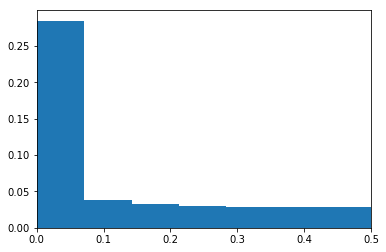

In [18]:
weights = np.ones_like(a)/float(len(a))
b=plt.hist(a,bins=100,weights=weights);
xlim([0,0.5])

In [19]:
zip(np.arange(10)*10,np.percentile(a,np.arange(10)*10))

[(0, 0.0),
 (10, 5.9991001799595089e-05),
 (20, 0.0022868755251326208),
 (30, 0.099363993969492193),
 (40, 0.31726658510200245),
 (50, 0.56665994345517445),
 (60, 0.81869087716006161),
 (70, 1.1050511254638751),
 (80, 1.4669357136545729),
 (90, 2.0163916039851362)]

## 1

In [5]:
import cPickle as pickle
p_pred,w=pickle.load(open("nb_4404p.pred"))

In [6]:
import cPickle as pickle
stores_idx,items_idx,days_idx,states,cities,families,types = pickle.load(open("array_index.pkl"))
rev_stores={v:u for u,v in stores_idx.items()}
rev_items={v:u for u,v in items_idx.items()}
rev_days={v:u for u,v in days_idx.items()}
item_perishable_map=pd.read_csv("../input/items.csv",index_col=0)['perishable'].to_dict()
sample=pd.read_csv("../input/test.csv")
sample['onpromotion']=sample['onpromotion'].astype(np.bool)
sample.head()

id        date  store_nbr  item_nbr  onpromotion
0  125497040  2017-08-16          1     96995        False
1  125497041  2017-08-16          1     99197        False
2  125497042  2017-08-16          1    103501        False
3  125497043  2017-08-16          1    103520        False
4  125497044  2017-08-16          1    103665        False

In [7]:
stores=np.array([rev_stores[u] for u in w[:,0]])
items=np.array([rev_items[u] for u in w[:,1]])
days=np.array([str(rev_days[u].date()) for u in range(1688,1688+16)])
len(days)

16

In [8]:
def f(i):
    u=p_pred[:,i]
    df=pd.DataFrame({'store_nbr':stores,'item_nbr':items,'pred':u})
    df['date']=days[i]
    return df

In [9]:
preddf=pd.concat([f(i) for i in range(len(days))])
preddf.head()

item_nbr          pred  store_nbr        date
0     96995  2.405512e-01          1  2017-08-16
1     99197  4.842964e-02          1  2017-08-16
2    103501  4.718379e-07          1  2017-08-16
3    103520  7.262483e-01          1  2017-08-16
4    103665  8.457282e-01          1  2017-08-16

In [10]:
p_subm=pd.merge(sample,preddf,how='left',on=['date','item_nbr','store_nbr'])

In [11]:
p_subm=p_subm.set_index('id')
p_subm.head()

date  store_nbr  item_nbr  onpromotion          pred
id                                                                   
125497040  2017-08-16          1     96995        False  2.405512e-01
125497041  2017-08-16          1     99197        False  4.842964e-02
125497042  2017-08-16          1    103501        False  4.718379e-07
125497043  2017-08-16          1    103520        False  7.262483e-01
125497044  2017-08-16          1    103665        False  8.457282e-01

In [12]:
p_sub_pred=p_subm['pred']

In [13]:
v_pred=pd.read_csv('../submission/mean_5nb.csv',index_col=0)

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
pd.concat([v_pred,p_sub_pred],axis=1).head()

unit_sales          pred
id                                 
125497040      0.2229  2.405512e-01
125497041      0.0826  4.842964e-02
125497042      0.0028  4.718379e-07
125497043      1.3421  7.262483e-01
125497044      2.0879  8.457282e-01

In [53]:
th=0.1
new_pred=v_pred.copy()
new_pred['unit_sales']=new_pred['unit_sales']*(p_sub_pred>th)

In [54]:
new_pred.head()

unit_sales
id                   
125497040      0.2229
125497041      0.0000
125497042      0.0000
125497043      1.3421
125497044      2.0879

In [15]:
new_pred=v_pred.copy()
new_pred['unit_sales']=new_pred['unit_sales']*p_sub_pred

In [16]:
fname='nb4_th{}.csv'.format('x')
new_pred.to_csv(fname,float_format='%.4f')

In [17]:
!7za a {fname+".7z"} {fname}


7-Zip (A) [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,8 CPUs)
Scanning

Creating archive nb4_thx.csv.7z

Compressing  nb4_thx.csv                                                                                                                                                                                                                                                                                                                                   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2  

## 2

In [50]:
import cPickle as pickle

In [51]:
p_pred,p_truth, p_mask=pickle.load(open("nb_valid_4404p.pred"))

In [52]:
v_pred,v_truth, v_mask=pickle.load(open("nb_valid_3304.pred"))

In [58]:
v_truth[np.isnan(v_truth)]=0

In [60]:
assert (p_mask==v_mask).all()
mask = p_mask

In [61]:
v_truth=v_truth[mask]
v_pred=v_pred[mask]
p_truth=p_truth[mask]
p_pred=p_pred[mask]

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mean_squared_error(v_pred ,v_truth)

0.25394803

In [67]:
def f(th):
    ind=p_pred<th
    this_pred=v_pred.copy()
    this_pred[ind]=0
    print th, mean_squared_error(this_pred ,v_truth)

In [72]:
for th in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    f(th)

0.1 0.249345
0.2 0.248864
0.3 0.250295
0.4 0.254775
0.5 0.264546
0.6 0.283518
0.7 0.319603


## 3

In [73]:
import cPickle as pickle

In [74]:
p_pred,p_truth, p_mask=pickle.load(open("nb_valid_4404p.pred"))

In [75]:
v_pred,v_truth, v_mask=pickle.load(open("nb_valid_4304.pred"))

In [76]:
v_truth[np.isnan(v_truth)]=0

In [77]:
assert (p_mask==v_mask).all()
mask = p_mask

In [78]:
v_truth=v_truth[mask]
v_pred=v_pred[mask]
p_truth=p_truth[mask]
p_pred=p_pred[mask]

In [79]:
from sklearn.metrics import mean_squared_error

In [83]:
mean_squared_error(v_pred ,v_truth),mean_squared_error(v_pred*p_pred ,v_truth)

(0.95594954, 0.24838617)

In [81]:
def f(th):
    ind=p_pred<th
    this_pred=v_pred.copy()
    this_pred[ind]=0
    print th, mean_squared_error(this_pred ,v_truth)

In [82]:
for th in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    f(th)

0.1 0.363955
0.2 0.33418
0.3 0.31495
0.4 0.302773
0.5 0.298655
0.6 0.305846
0.7 0.332162


In [84]:
v_pred2=v_pred*p_pred
def f(th):
    ind=p_pred<th
    this_pred=v_pred2.copy()
    this_pred[ind]=0
    print th, mean_squared_error(this_pred ,v_truth)

In [86]:
for th in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    f(th)

0 0.248386
0.1 0.248521
0.2 0.249287
0.3 0.251438
0.4 0.256264
0.5 0.266043
0.6 0.284803
0.7 0.320343


In [87]:
np.sqrt(0.268/1.05)

0.50521094132856548